In [2]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
bos= pd.DataFrame( boston.data)

In [10]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
bos.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [13]:
bos.columns= boston.feature_names

In [14]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [15]:
bos['Price']= boston.target

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = bos.drop('Price' , axis= 1)

In [18]:
lm= LinearRegression()

In [19]:
lm.fit(X, bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
ans= pd.DataFrame(zip(X.columns, lm.coef_), columns= ['Attribute ', 'Coeeficient weightage'])

In [22]:
ans

,Attribute,Coeeficient weightage
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


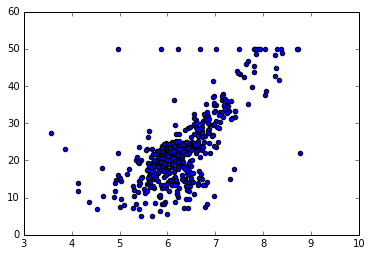

In [24]:
plt.scatter(bos.RM, bos.Price)

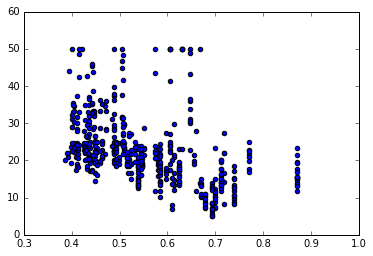

In [25]:
plt.scatter(bos.NOX, bos.Price)

In [26]:
lm.predict((X))

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483,  18.9958266 ,  21.58970854,
        20.90534851,  19.55535931,  19.2837957 ,  19.30000174,
        20.52889993,  16.9096749 ,  16.17067411,  18.40781636,
        12.52040454,  17.67104565,  15.82934891,  13.80368317,
        15.67708138,  13.3791645 ,  15.46258829,  14.69863607,
        19.54518512,  20.87309945,  11.44806825,  18.05900412,
         8.78841666,  14.27882319,  13.69097132,  23.81755469,
        22.34216285,  23.11123204,  22.91494157,  31.35826216,
        34.21485385,  28.0207132 ,  25.20646572,  24.61192851,
        22.94438953,  22.10150945,  20.42467417,  18.03614022,
         9.10176198,  17.20856571,  21.28259372,  23.97621248,
        27.65853521,  24.0521088 ,  15.35989132,  31.14817003,
        24.85878746,  33.11017111,  21.77458036,  21.08526739,
        17.87203538,  18.50881381,  23.9879809 ,  22.54

In [37]:
sqr_error  = (bos.Price- lm.predict((X)))**2

In [38]:
mse= np.mean(sqr_error)

In [39]:
mse

21.897779217687496